<a href="https://colab.research.google.com/github/ttma333/python/blob/main/2%EC%B0%A8%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B82022_12_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 경로설정

In [ ]:
cd/content/drive/MyDrive/lmemdata

/content/drive/MyDrive/lmemdata


## plt,sns 한글깨짐 해결방법 

In [ ]:
# 한글 깨짐 해결방법 : 실행 후 Restart runtime 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (4,301 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rc('font', family='NanumBarunGothic')


## 데이터 읽어오기

file_list_txt 안에는 ['상품분류.txt', '채널이용.txt','경쟁사이용.txt',
'고객DEMO.txt', '멤버십여부.txt']가 있고 데이터프레임 이름은 각각
data_1 에서 data_5 

상품분류: data_1

채널이용: data_2

경쟁사이용: data_3

고객DEMO : data_4

멤버십여부 : data_5

구매상품TR : data_6

data_6+data_1 : total

In [ ]:
import os
path = '/content/drive/MyDrive/lmemdata'
file_list = os.listdir(path)
file_list_txt=[file for file in file_list if file.endswith('.txt')]
del file_list_txt[-1]

for i,j in zip(file_list_txt,range(1,len(file_list_txt)+1)):
  basename = os.path.basename(f"{i}")
  name ,txt = os.path.splitext(basename)
  globals()[f'data_{j}'] = pd.read_csv(f'{i}',sep = ",",  engine='python', encoding = "cp949")

In [ ]:
total = pd.read_csv('/content/drive/MyDrive/lmemdata/total.csv', engine='python',chunksize=2000000)

In [ ]:
total = list(total)
total = pd.concat(total)

In [ ]:
total.drop(total.columns[0],axis=1,inplace=True)

## 점포 매출 TOP20(2년,2014년,2015년) data_6 구매상품TR 데이터프레임 사용
- zumpo_total = 2년
- zumpo_2014_buy = 2014년
- zumpo_2015_buy = 2015년

 ### 2년간 매출순위 높은 점포순 Top 20

In [ ]:
data_6

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액
0,B,8664000,15,1504,B150401,17218,44,20140222,20,2420
1,B,8664000,16,1601,B160101,17218,44,20140222,20,1070
2,B,8664000,16,1602,B160201,17218,44,20140222,20,8060
3,B,8664000,18,1803,B180301,17218,44,20140222,20,6000
4,B,8664001,5,509,B050901,17674,44,20140222,22,1120
...,...,...,...,...,...,...,...,...,...,...
28593025,B,8116737,37,3709,B370904,7439,29,20150525,19,14000
28593026,B,8116738,37,3709,B370904,16421,29,20150525,20,6500
28593027,B,8116739,8,802,B080203,8266,29,20150525,13,16000
28593028,B,8116764,90,9001,B900103,14316,29,20150526,19,1000


In [ ]:
zumpo_total=data_6['점포코드'].unique()

In [ ]:
zumpo_total=list(zumpo_total)

In [ ]:
zumpo_year = []
for i in zumpo_total:
  a=data_6[data_6['점포코드']==i]['구매금액'].sum()
  zumpo_year.append(a)

In [ ]:
총구매={'점포코드' : zumpo_total ,'총구매금액' : zumpo_year}
zumpo_total=pd.DataFrame(총구매)

In [ ]:
zumpo_total

,점포코드,총구매금액
0,44,4996100298
1,45,1759061453
2,11,8491091145
3,43,11060539793
4,48,1255578643
...,...,...
588,575,381450
589,450,739571
590,404,373720
591,172,520490


In [ ]:
zumpo_total=zumpo_total.sort_values('총구매금액',ascending=False)
zumpo_total.head(20)

,점포코드,총구매금액
50,2,68573169608
44,1,52323921827
21,20,36267414551
54,4,32926855308
17,29,28981974329
64,37,26879559790
10,7,25122985870
22,12,23538096546
47,16,21029849925
41,10,18606543134


### 2014년 매출높은 점포순 top 20

In [ ]:
zumpo_2014=data_6[data_6['구매일자'] < 20150101]

In [ ]:
zumpo_2014_unique=zumpo_2014['점포코드'].unique()

In [ ]:
zumpo_2014_unique=list(zumpo_2014_unique)

In [ ]:
zumpo_2014_list = []
for i in zumpo_2014_unique:
  a=zumpo_2014[zumpo_2014['점포코드']==i]['구매금액'].sum()
  zumpo_2014_list.append(a)

In [ ]:
총구매={'점포코드' : zumpo_2014_unique ,'총구매금액' : zumpo_2014_list}
zumpo_2014_buy=pd.DataFrame(총구매)

In [ ]:
zumpo_2014_buy=zumpo_2014_buy.sort_values('총구매금액',ascending=False)
zumpo_2014_buy.head(20)

,점포코드,총구매금액
35,2,34034428784
28,1,25387964626
26,20,17623879972
40,4,15914498992
31,29,14298953559
49,37,12962538952
5,7,12393221754
12,12,11568506422
36,16,10616470687
25,10,9755872643


### 2015년 매출 높은 점포순 top 20


In [ ]:
zumpo_2015=data_6[data_6['구매일자'] > 20141231]

In [ ]:
zumpo_2015_buy=zumpo_2015.groupby('점포코드')[['구매금액']].sum().sort_values('구매금액',ascending=False)

In [ ]:
zumpo_2015_buy=zumpo_2015_buy.reset_index()

In [ ]:
zumpo_2015_buy.head(20)

,점포코드,구매금액
0,2,34538740824
1,1,26935957201
2,20,18643534579
3,4,17012356316
4,29,14683020770
5,37,13917020838
6,7,12729764116
7,12,11969590124
8,16,10413379238
9,10,8850670491


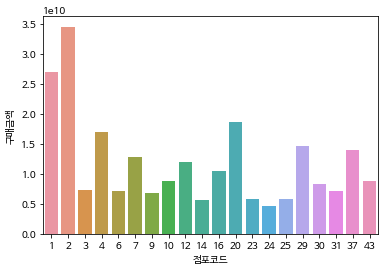

In [ ]:
import seaborn as sns
sns.barplot(data=zumpo_2015_buy.head(20),x='점포코드',y='구매금액')


### 점포매출 TOP 20 시각화 

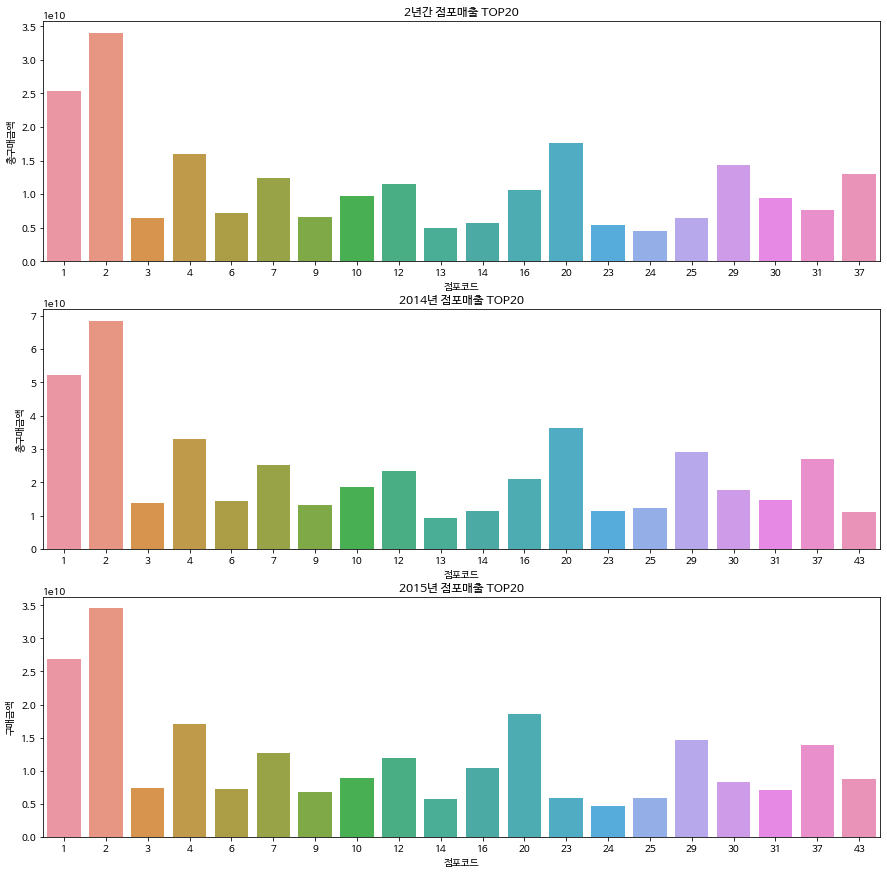

In [ ]:
plt.rcParams["figure.figsize"] = (15, 15)
fig, ax = plt.subplots(nrows=3)

sns.barplot(data=zumpo_total.head(20),x='점포코드',y='총구매금액',ax=ax[1])
sns.barplot(data=zumpo_2014_buy.head(20),x='점포코드',y='총구매금액',ax=ax[0])
sns.barplot(data=zumpo_2015_buy.head(20),x='점포코드',y='구매금액',ax=ax[2])

ax[0].set_title("2년간 점포매출 TOP20")
ax[1].set_title("2014년 점포매출 TOP20")
ax[2].set_title("2015년 점포매출 TOP20")

plt.show()

## 고객별 매출 통계(total 데이터프레임사용)

In [161]:
total

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,중분류명,소분류명,연도,월,연도_월
0,B,8664000,15,1504,B150401,17218,44,20140222,20,2420,탄산음료,사이다,2014,2,201402
1,B,8664007,15,1504,B150401,11303,44,20140222,13,2400,탄산음료,사이다,2014,2,201402
2,B,8919520,15,1504,B150401,13210,48,20150921,19,5250,탄산음료,사이다,2015,9,201509
3,B,6956422,15,1504,B150401,13823,12,20140813,18,2250,탄산음료,사이다,2014,8,201408
4,B,6957156,15,1504,B150401,18970,12,20140831,22,4900,탄산음료,사이다,2014,8,201408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,B,7269975,14,1415,B141503,134,16,20141130,15,8900,전통과자,온라인팥빙수재료,2014,11,201411
28593026,B,7946814,68,6802,B680209,18484,26,20141227,14,1000,여성양말,여성발가락,2014,12,201412
28593027,B,7777110,7,702,B070203,5043,21,20151012,22,4510,즉석구이안주,즉석쥐포,2015,10,201510
28593028,B,7579178,7,703,B070305,4073,18,20140125,20,8900,마른안주,온라인 안주,2014,1,201401


### 2년간 고객매출 통계(고객번호기준)

In [ ]:
len(total['고객번호'].unique())

19383

In [ ]:
total.groupby('고객번호')[['구매금액']].sum().sort_values('구매금액',ascending=False)

,구매금액
고객번호,
15999,3571831616
14599,2640330093
7957,2134908726
16406,1881644780
6207,1721008092
...,...
19209,40000
13486,37700
19240,32700


#### 데이터 전처리한것 csv로 저장(그냥이파일불러서 한번에 처리하기위해)
- csv로 저장
- total.to_csv('/content/drive/MyDrive/lmemdata/total.csv')
- total_customer.to_csv('/content/drive/MyDrive/lmemdata/total_customer.csv')

In [166]:
total_customer=pd.read_csv('/content/drive/MyDrive/lmemdata/total_customer.csv')
total_customer.drop(total_customer.columns[0],axis=1,inplace=True)
total_customer

,고객번호,연도,구매금액,구매평균
0,1,2014,54041667,90979.237374
1,1,2015,31000883,66956.550756
2,2,2014,46245330,75812.016393
3,2,2015,53635430,105998.873518
4,3,2014,1893769,2562.610284
...,...,...,...,...
38701,19380,2014,522700,30747.058824
38702,19380,2015,3390277,8014.839243
38703,19381,2015,6040669,7503.936646
38704,19382,2015,4401773,4858.469095


### 2014,2015 고객 총매출,구매평균 비교후 성장률계산
- 구매증가 고객도 있었고 감소 고객도 있었다

In [ ]:
total_customer

,고객번호,연도,구매금액,구매평균
0,1,2014,54041667,90979.237374
1,1,2015,31000883,66956.550756
2,2,2014,46245330,75812.016393
3,2,2015,53635430,105998.873518
4,3,2014,1893769,2562.610284
...,...,...,...,...
38701,19380,2014,522700,30747.058824
38702,19380,2015,3390277,8014.839243
38703,19381,2015,6040669,7503.936646
38704,19382,2015,4401773,4858.469095


In [ ]:
total_customer_pv=total_customer.pivot(index='고객번호',columns='연도',values='구매금액')
total_customer_pv['성장률']=((total_customer_pv[2015]-total_customer_pv[2014])/total_customer_pv[2014]).round(2)

In [ ]:
total_customer_pv

연도,2014,2015,성장률
고객번호,,,
1,54041667.0,31000883.0,-0.43
2,46245330.0,53635430.0,0.16
3,1893769.0,1271398.0,-0.33
4,9299616.0,7394194.0,-0.20
5,7685880.0,5551190.0,-0.28
...,...,...,...
19379,1190620.0,4588660.0,2.85
19380,522700.0,3390277.0,5.49
19381,NaN,6040669.0,NaN


### 2014 2015 총매출 성장률

- 2014년 대비 2015년 매출 5퍼 성장

In [ ]:
print(total_customer_pv[2014].sum())
print(total_customer_pv[2015].sum())
print((total_customer_pv[2015].sum()-total_customer_pv[2014].sum())/total_customer_pv[2014].sum())

329601840581.0
347417316360.0
0.05405150574279584


### 2015년 신규고객과 2014년 구매기록이 있지만 2015년에 구매하지않은고객

In [ ]:
# 2015년 신규고객은 45명
total_customer_pv[[2014]].isnull().sum().values

array([45])

In [ ]:
# 2014년 구매기록이 있지만 2015년 구매기록이 없는 고객 15명
total_customer_pv[[2015]].isnull().sum().values

array([15])

In [ ]:
# 2015년 신규고객 고객번호
import numpy as np
new_customer_number= total_customer_pv[2014].index[total_customer_pv[2014].apply(np.isnan)].values
print(new_customer_number)

[ 1262  1379  7196  7774  9813 10695 12077 12391 12819 13117 13643 13769
 14698 15402 15411 15697 16020 16103 16335 16575 16837 16992 17382 17951
 18089 18632 18681 18761 18799 19094 19138 19201 19208 19209 19215 19217
 19231 19234 19237 19244 19283 19350 19381 19382 19383]


In [ ]:
# 2014년 구매기록이 있지만 2015년 구매기록이 없는 고객 고객번호
import numpy as np
customer_number_2015 = total_customer_pv[2015].index[total_customer_pv[2015].apply(np.isnan)].values
print(customer_number_2015)

[ 1208  2019  5704  7841 10613 13309 13486 17094 17195 17454 17650 19212
 19229 19240 19294]


### 구매감소고객(구매율 증가가 - 성장률을 보인고객수)

In [ ]:
# 2015년 신규고객 제거
total_customer_pv_drop=total_customer_pv.drop(list(new_customer_number))

In [ ]:
# nan 값 0으로 채우기
total_customer_pv_drop.fillna(0,inplace=True)

In [ ]:
# 구매감소고객 8754명 
total_customer_pv_drop[total_customer_pv_drop['성장률'] <= 0]

연도,2014,2015,성장률
고객번호,,,
1,54041667.0,31000883.0,-0.43
3,1893769.0,1271398.0,-0.33
4,9299616.0,7394194.0,-0.20
5,7685880.0,5551190.0,-0.28
10,9355850.0,9195077.0,-0.02
...,...,...,...
19333,2560778.0,2176720.0,-0.15
19334,8935462.0,3418069.0,-0.62
19346,1965906.0,95380.0,-0.95


In [ ]:
# 구매감소고객 비율 45퍼
print(8754/19338)

0.45268383493639464


## RFM

In [ ]:
len(total['고객번호'].unique())
import numpy as np

In [ ]:
total_2=total_1.query("구매일자< 20151231 and 구매일자> 20150831").groupby('고객번호').agg({'영수증번호':'count','구매금액':'sum'}).sort_values('구매금액',ascending=False)
total_2=total_2.reset_index()
total_2

,고객번호,영수증번호,구매금액
0,16406,210,945531900
1,15999,142,808990020
2,6200,214,578858640
3,14599,72,486066380
4,16005,173,447163500
...,...,...,...
19327,5225,1,2520
19328,19346,1,2380
19329,10082,1,1940
19330,10400,1,1580


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
a=total_2['영수증번호'].unique()

In [ ]:
c=[]
for i in a:  
  b=total_2[total_2['영수증번호'] == i]['영수증번호'].count()
  c.append(b)

In [ ]:
print(len(a),len(c))

315 315


In [ ]:
d = {'영수증':a,'갯수':c}
영수증=pd.DataFrame(d)
영수증.sort_values('영수증')

,영수증,갯수
293,1,36
306,2,32
313,3,34
263,4,31
264,5,26
...,...,...
231,460,1
283,461,1
282,463,1
205,496,1


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm
import plotly.express as px
#NANUM_GOTHIC = fm.FontProperties(fname='/usr/share/fonts/truetype/nanum/NanumGothic.ttf')

#fm._rebuild()

#plt.rc('font', family=NANUM_GOTHIC.get_name())
px.scatter(영수증,x='영수증',y='갯수')


In [ ]:
total_2['영수증번호'].count()

19332

In [ ]:
total_2[['영수증번호']]

,영수증번호
0,210
1,142
2,214
3,72
4,173
...,...
19327,1
19328,1
19329,1
19330,1


In [ ]:
total_1.groupby('고객번호')[['영수증번호']].count().sort_values('영수증번호')

,영수증번호
고객번호,
19229,1
19294,1
12077,1
19240,1
10613,1
...,...
928,1536
5308,1621
421,1651


In [ ]:
total_1=total.drop_duplicates('영수증번호')
total_1

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액
0,A,1,101,A010101,일용잡화,위생세제,2757986,15148,10,20140920,20,1000
1,A,1,101,A010101,일용잡화,위생세제,2757988,2043,10,20140920,13,3950
2,A,1,101,A010101,일용잡화,위생세제,2757989,2231,10,20140920,13,20780
3,A,1,101,A010101,일용잡화,위생세제,1254647,177,31,20140120,17,8900
4,A,1,101,A010101,일용잡화,위생세제,1254657,12808,31,20140120,16,3900
...,...,...,...,...,...,...,...,...,...,...,...,...
28593012,D,8,804,D080401,네일메이크업,일반네일/케어류,242262,1342,33,20150718,11,8000
28593013,D,8,804,D080401,네일메이크업,일반네일/케어류,188566,9843,7,20140205,19,17600
28593021,D,8,804,D080401,네일메이크업,일반네일/케어류,242569,1268,33,20150910,14,6000
28593022,D,8,804,D080401,네일메이크업,일반네일/케어류,242572,1268,33,20150910,14,6000
